In [ ]:
# Wie bisher müssen für dieses Blatt auch wieder Packages installiert werden
!apt-get update
!apt -y install -qq aria2 libcairo2-dev pkg-config python3-dev
!pip install igraph==0.9.8
!apt install libcairo2-dev
!pip install pycairo

     |████████████████████████████████| 3.2 MB 5.4 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-com

In [ ]:
# Laden der Packages
from igraph import *
import pandas as pd

Willkommen zum dritten Python-Problem Set in diesem Modul!  
Sie finden hier eine Aufgabe (*Exercise 6*) zu Inhalten aus Kapitel 3 *Social Network Analysis* - konkret zu dem Teil 3.2 *Zentralität in Netzwerken*.

# Aufgabe 6

### Aufgabe 6.1

Im Skript haben Sie am Beispiel eines Terrornetzwerks verschiedene Zentralitätsmaße kennengelernt. In dieser Aufgabe werden Sie Python dazu nutzen, diese Zentralitätsmaße nicht nur auf einzelne wenige Knoten, sondern auf den gesamten Graphen anzuwenden.

---
Laden Sie den Datensatz, der die Beziehungen der Terroristen nach Krebs (2002) beschreibt, indem Sie den folgenden Code ausführen.

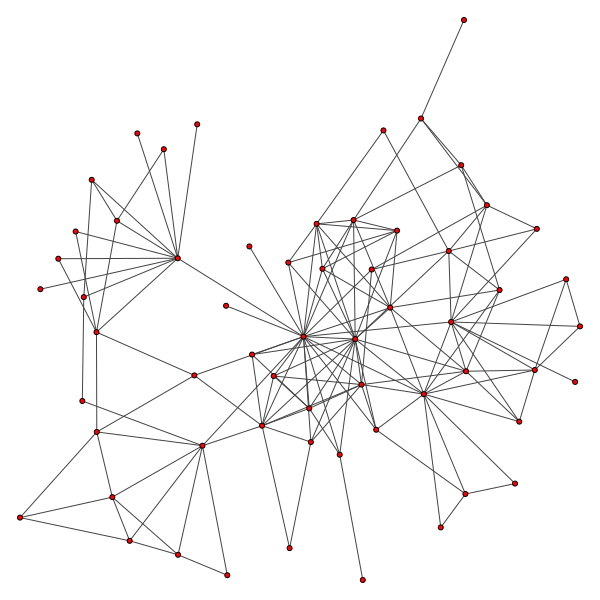

In [ ]:
# {"6_1"}
#Laden des Datensatzes "Terrornetzwerk_Datensatz.csv"
terrornet = pd.read_csv('https://raw.githubusercontent.com/larsmoe/SAPS-BSDA-Kurs/master/Problemsets%20Python/PS_Nr_3_Python/Terrornetzwerk_Datensatz.csv', sep=";", header=None)
#Erstellen des Graphen g_terrornet
g_terrornet = Graph.DataFrame(edges=terrornet, directed=False)
#Plotten des Graphen g_terrornet
plot(g_terrornet, vertex_label=g_terrornet.vs.indices)

Das Netzwerk besteht aus den 19 Flugzeugentführern des Anschlags am 11. September 2001 und weiteren verbündeten Terroristen (Krebs, 2002). Insgesamt sind 60 Terroristen mit 151 Verbindungen berücksichtigt. Im Laufe dieser Aufgabe wollen wir herausfinden, welche der hier erfassten Terroristen in diesem Netzwerk eine **zentrale** Rolle spielen - in Bezug auf
* die **Anzahl der direkten Kontakte** im Terrornetzwerk 
* die **Kürze der Distanz** zu allen anderen Kontakten 
* die Rolle bei der **Weitergabe von Informationen**

## a) Degree Centrality

In einem ungerichteten Netzwerk lässt sich die Zentralität eines Knotens beispielsweise über die (ungerichtete) **Degree Centrality** bestimmen. Sie gibt die *Anzahl der direkten Nachbarn des betrachteten Knotens* an - bezieht sich also auf den ersten der drei oben genannten Kontexte - und bestimmt sich über die folgende Formel:
$$C_D(n_i)=\sum_{j=1, i \neq j}^{|N|} A_{ij}$$

In Python können Sie dieses Zentralitätsmaß bereits mit einem Ihnen bekannten Befehl berechnen lassen: dem Befehl zur Ermittlung der Anzahl der aus- bzw. eingehenden Kanten eines Knotens *graph.degree(vertices)* mit *vertices* als betrachtetem Knoten. Per default werden im Argument *vertices* alle Knoten des Netzwerkes betrachtet. In einem Fall weicht der Befehl jedoch von dem zur Berechnung des Node Degree ab: Falls der Knoten eine Kante zu sich selbst (Schleife) besitzt, so darf diese nicht berücksichtigt werden. In der Funktion *degree* erreicht man dies durch das Argument *loops=False* (per default auf *True* gesetzt).  
Aus der Degree Centrality cann durch Division mit dem maximialen Degree im Netzwerk auch die normalisierte Degree Centrality berechnet werden. Den Code dazu müssen Sie nicht selbst schreiben. Er steht bereits in der Zelle. 

### Aufgabe 6.2

- - -
*Aufgabe:* Im nächsten Code-Chunk sollen die Degree Centrality für alle Knoten des (ungerichteten) Terrornetzwerks berechnet und anschließend in absteigender Reihenfolge sortiert werden (normal und normalisierte Degree Centrality). Damit erhalten Sie eine Auskunft darüber, welche Knoten die meisten direkten Kontakte besitzen. Dazu benötigen Sie unter anderem die Funktion *sorted(x, reverse)*, welche den Vektor *x* sortiert zurückgibt - in absteigender Reihenfolge mithilfe von *reverse=True*.
- - -

In [ ]:
# {r "6_2"}
#Berechnen Sie die Degree Centrality für alle Knoten in g_terrornet
#und speichern Sie die Werte in der Variable C_D_terror

#Berechnen der normalisierten Degree Centrality
C_Dnorm_terror = [degree / g_terrornet.maxdegree() for degree in C_D_terror]
#Sortieren Sie die Vektoren und wählen Sie die ersten 6 Zeilen der Ergebnisse

#Lassen Sie sich beide Variablen ausgeben
print(C_D_terror_main)
print(C_Dnorm_terror_main)

[22, 18, 13, 11, 11, 10]
[1.0, 0.8181818181818182, 0.5909090909090909, 0.5, 0.5, 0.45454545454545453]


#### Tipps

##### Tipp 1

Rufen Sie den Befehl *graph.degree(loops=False)* auf

##### Tipp 2

Verwenden Sie zum sortieren den Befehl *sorted(Ergebnis aus der ersten Berechnung, reverse=True)*

##### Tipp 3

Erinnern Sie sich, dass Sie mit [0:6] am Ende eines Befehls nur die ersten 6 Zeilen des Ergebnisses ausgeben können

##### Lösung

Berechnen Sie die Degree Centrality für alle Knoten in g_terrornet und speichern Sie die Werte in der Variable C_D_terror
<br><br>*C_D_terror = g_terrornet.degree(loops=False)*
<br><br>Berechnen der normalisierten Degree Centrality
<br><br>*C_Dnorm_terror = [degree / g_terrornet.maxdegree() for degree in C_D_terror]*
<br><br>Sortieren Sie die Vektoren und wählen Sie die ersten 6 Zeilen der Ergebnisse indem Sie den folgenen Code ergänzen
<br><br>*C_D_terror_main = sorted(C_D_terror, reverse=True)[0:6]*
*C_Dnorm_terror_main = sorted(C_Dnorm_terror, reverse=True)[0:6]*
<br><br>Lassen Sie sich beide Variablen ausgeben
<br><br>*print(C_D_terror_main)*
*print(C_Dnorm_terror_main)*

#### Erklärung

Bei dem hier betrachteten Netzwerk handelt es sich um ein ungerichtetes Netzwerk. Für *gerichtete Netzwerke* unterscheidet man - wie Sie im Skript bereits erfahren haben - die **(normierte) In-Degree** und die **(normierte) Out-Degree Centrality**. Diese beiden Zentralitätsmaße lassen sich jedoch ebenfalls mit dem gleichen Befehl berechnen. Dazu muss ein zusätzlicher Parameter *mode*, welcher bei ungerichteten Graphen ignoriert wird, entsprechend auf *"in"* (für In-Degree Centrality) bzw. *"out"* (für Out-Degree Centrality) gesetzt werden.

*Anmerkung: Die folgenden beiden Zentralitätsmaße - Closeness Centrality und Betweenness Centrality - werden im Rahmen dieser Veranstaltung lediglich für ungerichtete Netzwerke betrachtet.*

### b) Closeness Centrality
Ein weiteres Zentralitätsmaß ist die **Closeness Centrality**. Sie ist eine hilfreiche Messgröße, um zu bestimmen, wie schnell ein Terrorist mit den anderen Verbündeten im Netzwerk Informationen austauschen kann: Je größer die Closeness Centrality, desto *kürzer sind die Informationswege zu allen anderen Terroristen*. Die Closeness Centrality
$$C_C(n_i)=\frac{1}{\sum_{j \neq i}d(n_i,n_j)}$$
kann im Package *'igraph'* mit dem Befehl *graph.closeness(vertices, mode, normalized)* ermittelt werden. Dabei bezeichnet *vertices* die Knoten, für die $C_C$ bestimmt werden soll (per default alle Knoten des Netzwerks) und mit dem Argument *normalized=True* kann die *normierte Closeness Centrality* bestimmt werden.  
Nun stellt sich die Frage, welche der im Netzwerk erfassten Terroristen am gefährlichsten in Bezug auf die Geschwindigkeit der Informationsweitergabe sind.

### Aufgabe 6.3

- - -
*Aufgabe:* Ermitteln Sie dies auf analoge Weise zum letzten Code-Chunk. Da das grundsätzliche Vorgehen sich hier wiederholt, sind Teile des Codes bereits vorgegeben.
- - - 

In [ ]:
# {"6_3"}
#Berechnen Sie die Closeness Centrality für alle Knoten in g_terrornet
#und speichern Sie die Werte in der Variable C_C_terror

#Verfahren Sie analog für die normierte Closeness Centrality und
#speichern Sie das Ergebnis in der Variable C_Cnorm_terror

#Ermittlung der ersten sechs Werte des absteigend sortierten 
#Vektors C_C_terror bzw. C_Cnorm_terror; 
#Speichern der Werte in den Variablen C_C_terror_main bzw. C_Cnorm_terror_main
# Verwenden Sie hier analog den Code aus der vorherigen Aufgabe
C_C_terror_main = sorted(C_C_terror, reverse=True)[0:6]
C_Cnorm_terror_main = sorted(C_Cnorm_terror, reverse=True)[0:6]
#Ausgabe der beiden Variablen
print(C_C_terror_main)
print(C_Cnorm_terror_main)

[0.6020408163265306,
 0.48360655737704916,
 0.4573643410852713,
 0.4573643410852713,
 0.44360902255639095,
 0.43703703703703706]

#### Tipps

##### Tipp 1

Rufen Sie den Befehl der Fom *graph.closeness(normalized=False)* auf

##### Lösung

Berechnen Sie die Closeness Centrality für alle Knoten in g_terrornet und speichern Sie die Werte in der Variable C_C_terror
<br><br>*C_C_terror = g_terrornet.closeness(normalized=False)*
<br><br>Verfahren Sie analog für die normierte Closeness Centrality und speichern Sie das Ergebnis in der Variable C_Cnorm_terror
<br><br>*C_Cnorm_terror = g_terrornet.closeness(normalized=True)*

Auch die Closeness Centrality kann für gerichtete Netzwerke berechnet werden. Da sie die kürzesten Pfade betrachtet, bietet der Befehl *closeness* erneut im Argument *mode* drei Möglichkeiten an: *"in"* zur Betrachtung der im Knoten *eingehenden* Kanten, *"out"* zur Betrachtung der vom Knoten *ausgehenden* Kanten und *"all"* zur Betrachtung *ungerichteter* Kanten an Stelle der gerichteten. Das soll an dieser Stelle jedoch nicht weiter vertieft werden.

## c) Betweenness Centrality

Abschließend bleibt die Frage, über welche hier erfassten Terroristen am meisten Informationen geleitet werden, da sie *auf vielen kürzesten Verbindungen zwischen anderen Terroristen* liegen. Dazu betrachten wir die im Skript für ungerichtete Netzwerke eingeführte **Betweenness Centrality**
$$C_B(n_i) = \sum_{j=1, i \neq j}^{|N|} \sum_{k>j, k \neq i}^{|N|} \frac{g_{jk}(n_i)}{g_{jk}}$$
Im Package *'igraph'* kann $C_B(n_i)$ mit dem Befehl *graph.betweenness(vertices)* bestimmt werden. Leider bietet diese Funktion keine Möglichkeit zur Berechnung der normierten Betweenness Centrality, weshalb wir an dieser Stelle auf diese Metrik verzichten.

### Aufgabe 6.4

- - -
*Aufgabe:* Wenden Sie den entsprechenden Befehl an, um die Betweenness Centrality für jedes Mitglied des Terroristennetzwerks zu ermitteln. Auch hier ist der Code gegeben, welcher die zentralsten Mitglieder in Bezug auf die Informationsweitergabe identifiziert und ihre Zentralitätsmaße ausgibt.
- - - 

In [ ]:
# {"6_4"}
#Berechnen Sie die Betweenness Centrality für alle Knoten in g_terrornet
#und speichern Sie die Werte in der Variable C_B_terror


#Ermittlung der ersten sechs Werte des absteigend sortierten 
#Vektors C_B_terror
#Speichern der Werte in den Variablen C_B_terror_main
C_B_terror_main = sorted(C_B_terror, reverse=True)[0:6]

#Ausgabe der Variable
print(C_B_terror_main)

[999.2298590298589, 457.9734432234432, 298.5333333333333, 269.90158730158737, 221.33069985569983, 163.83145465645464]


#### Tipps

##### Tipp 1

Wenden Sie den Befehld der Form *graph.betweenness()* an

##### Lösung

C_B_terror = g_terrornet.betweenness()

## d) Prestige-basierte Zentralitätsmaße: Eigenvector Centrality und Google's PageRank

Testen wir nun, ob dieser Knoten auch nach der Eigenvector Centrality als zentral eingestuft wird. Gerade bei diesem Zentralitätsmaß ist Python besonders hilfreich, da die händische Berechnung hier schlecht möglich ist.  
Der Befehl *graph.eigenvector_centrality(directed, weights)* aus dem Package *'igraph'* bestimmt die Eigenvector Centrality aller Knoten für gerichtete sowie ungerichtete Graphen. Dies kann mit dem Argument *directed* spezifiziert werden, welches per default auf *True* gesetzt ist.

### Aufgabe 6.5

- - -
*Aufgabe:* Wenden Sie im folgenden Code-Chunk den Befehl an. Beachten Sie, dass das Argument *weights* im betrachteten Netzwerk keine Rolle spielt, da es sich um ein ungewichtetes Netzwerk handelt.
- - -

In [ ]:
# {"6_5"}
#Berechnen Sie die Eigenvector Centrality für alle Knoten von g_terrornet
#und speichern Sie die ausgegebene Liste in der Variable C_E_terror


#### Tipps

##### Tipp 1

Wenden Sie en Befehl der Form *graph.eigenvector_centrality()* an

##### Lösung

C_E_terror =g_terrornet.eigenvector_centrality()

### Aufgabe 6.6

Schauen Sie sich den folgenden Code an und führen Sie ihn aus. Der Code liefert den Knoten im Netzwerk mit der größten Eigenvector Centrality und gibt zudem den Wert dafür aus. Das *+ 1* ist für uns als Hilfe gedacht, da in Python die Indexierung bei 0 beginnt, wir aber den 0. Knoten eigentlich als 1. Knoten bezeichnen würden.

In [ ]:
# {"6_6"}
#Bestimmung des Knotens mit der größten Eigenvector Centrality
print(C_E_terror.index(max(C_E_terror)) + 1)
#Bestimmung dieses größten Eigenvector Centrality-Werts im Netzwerk
print(max(C_E_terror))

36
1.0


### Aufgabe 6.7

Wie Sie sehen, ist dieser Knoten sogar bezüglich des vierten Zentralitätsmaßes der zentralste Knoten.

Zum Abschluss dieser Aufgabe wenden wir Google's PageRank-Algorithmus auf einen *gerichteten Graphen* an: Dazu beschäftigen wir uns erneut dem Netzwerk *Karate*. Laden Sie erneut die Daten hierfür und plotten Sie den Graphen, indem Sie den folgenden Code ausführen.

In [ ]:
# {"6_7"}
# Import des Karate Netzwerks
karate = pd.read_csv('https://raw.githubusercontent.com/larsmoe/SAPS-BSDA-Kurs/master/Problemsets%20Python/PS_Nr_2_Python/data/Karate/KARATE.csv', sep=";", header=None, names=['A','B'])
karate = karate.subtract(1)

# Mithilfe der Rohdaten werden jetzt die Kanten generiert, die als Input für das igraph package dienen
def create_edge_list(node_list1, node_list2):
    edge_list = []
    for node_1, node_2 in zip(node_list1, node_list2):
        edge = (node_1, node_2)
        edge_list.append(edge)
    return edge_list

karate_edges = create_edge_list(karate['A'].to_list(), karate['B'].to_list())

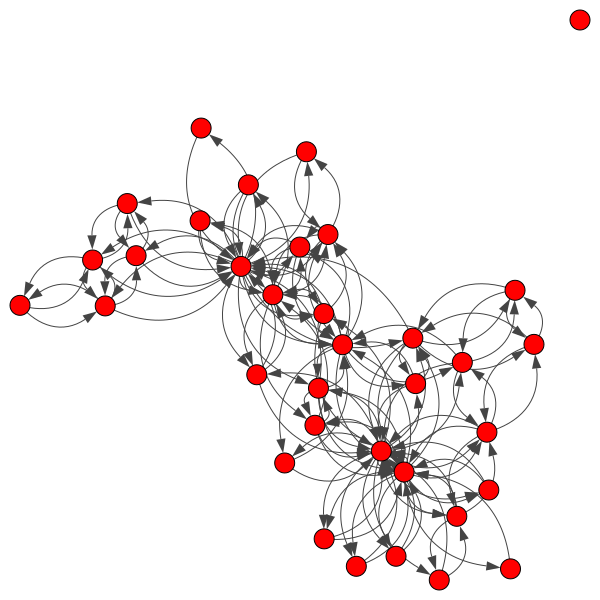

In [ ]:
#Plotten des Graphen
graph_karate = Graph(n=34, edges=karate_edges, directed=True)
plot(graph_karate)

### Aufgabe 6.8

Der Befehl *graph.page_rank(vertices)* aus dem Package *'igraph'* bestimmt den PageRank der Knoten, die in *vertices* angegeben werden (per default alle).
- - -
*Aufgabe:* Wenden Sie nun im nächsten Code-Chunk den PageRank-Algorithmus auf den Graphen *karate* an.
- - -

In [ ]:
# {"6_8"}
#Berechnen Sie den PageRank für alle Knoten von karate
#und speichern Sie die resultierende Liste in der Variable C_R_karate
C_R_karate = graph_karate.pagerank()
#Geben Sie die ersten sechs Elemente von C_R_karate aus
print(C_R_karate[0:6])
#Geben Sie das Maximum von C_R_karate aus
print(max(C_R_karate))

[0.004392386530014642, 0.09705419441834287, 0.052962809198035005, 0.05739550046948946, 0.03588793044851046]
0.09705419441834287


#### Tipps

##### Tipp 1

Wenden Sie den Befehl der Form *graph.pagerank()* an

##### Tipp 2

Verwenden Sie [0:6] am Ende des Variablennamens um die ersten 6 Zeilen auszuwählen

##### Lösung

Berechnen Sie den PageRank für alle Knoten von karate und speichern Sie die resultierende Liste in der Variable C_R_karate
<br><br>*C_R_karate = graph_karate.pagerank()*
<br><br>Geben Sie die ersten sechs Elemente von C_R_karate aus
<br><br>*print(C_R_karate[0:6])*
<br><br>Geben Sie das Maximum von C_R_karate aus
<br><br>*print(max(C_R_karate))*